# Plotting

In [ ]:
# The autoreload extension allows you to tweak the code in the imported modules (`pp`)
# and rerun cells to reflect the changes.
%load_ext autoreload
%autoreload 2
%reload_ext ipy_dict_hierarchy

import sys
sys.path.append("../ana/")

import paper_plots as pp
pp.log.setLevel("ERROR")

# Model of Spiking Neurons
## Partial Stimulation


    Wrapper for Figure 3 on Simulations containing
    - pooled Violins that aggregate the results of all trials for
        * Event size and Correlation Coefficient
        * at 0Hz vs 20Hz additional stimulation in targeted modules (on top of 80Hz baseline)
    - Decomposition plots (scatter and bar) anaologous to Figure 2
    


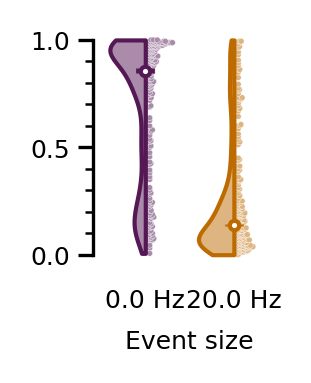

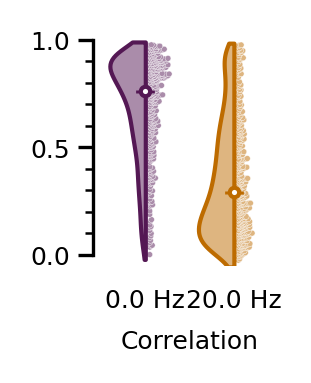

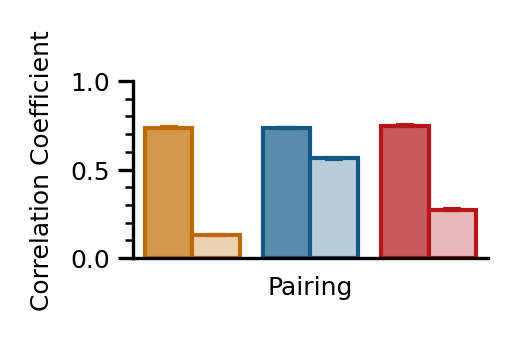

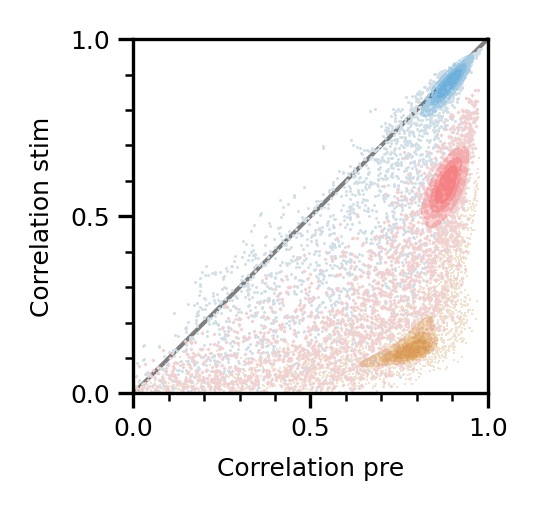

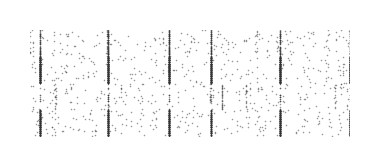

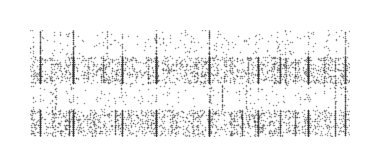

In [12]:
print(pp.fig_3.__doc__)
pp.fig_3()

In [ ]:
# to reproduce the figure 3 for the case with blocked inhibition,
# we need to tweak the file paths a bit:
pp.fig_3(
    # processed data frame
    pd_path=f"{pp.p_sim}/lif/processed/k=5_partial_no_inhib.hdf5",
    # raw data for rasters, note jG=0
    raw_paths=[
        f"{pp.p_sim}/lif/raw/stim=02_k=5_jA=45.0_jG=0.0_jM=15.0_tD=20.0_rate=80.0_stimrate=0.0_rep=001.hdf5",
        f"{pp.p_sim}/lif/raw/stim=02_k=5_jA=45.0_jG=0.0_jM=15.0_tD=20.0_rate=80.0_stimrate=20.0_rep=001.hdf5",
    ],

)

## Stimulation in all modules


    Wrapper for Figure 4 (extended) on Simulations containing
    - As a function of increasing Synaptic Noise Rate:
        * For k=5, the "Fraction of events that span"
            across 4 (dark), 3, 2, or only 1 modules (light)
        * For k=1 (lightest), k=5, k=10 and merged (darkest)
            - Mean Event size (Fraction of neurons that contribute to the event)
            - Mean Correlation Coefficient (neuron pairs)
            - Median and Mean rij (module pairs)
            - Functional Complexity
            - Average Number of spikes each neuron fired during a detected event
            - Inter-event interval
            - Core delay (the delay between the time points of each involved
                modules maximum firing rate)
            - The average amount of synaptic resources at the time of the starting
                of the bursting event
    


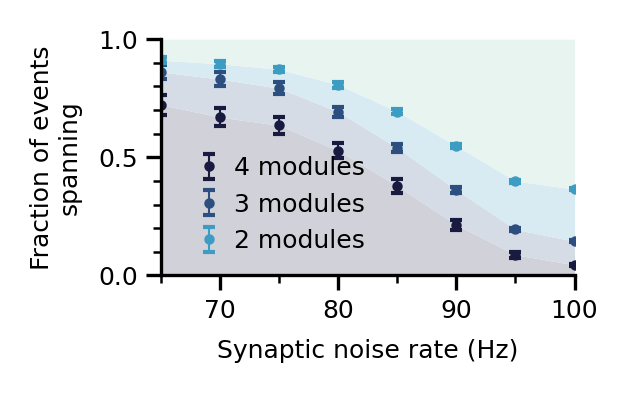

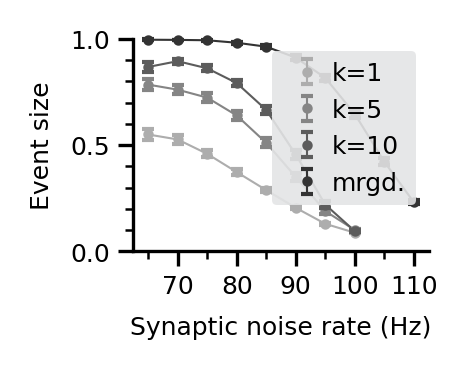

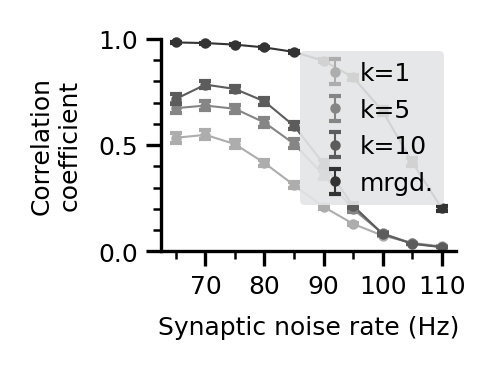

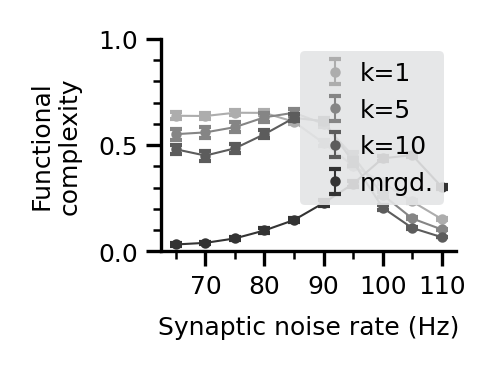

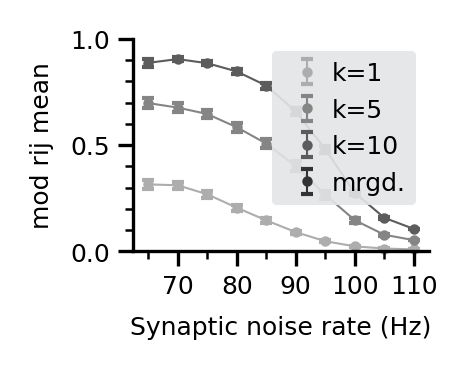

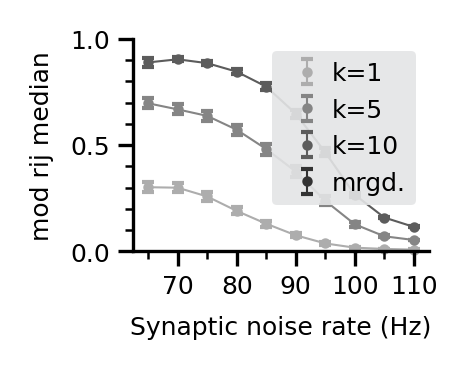

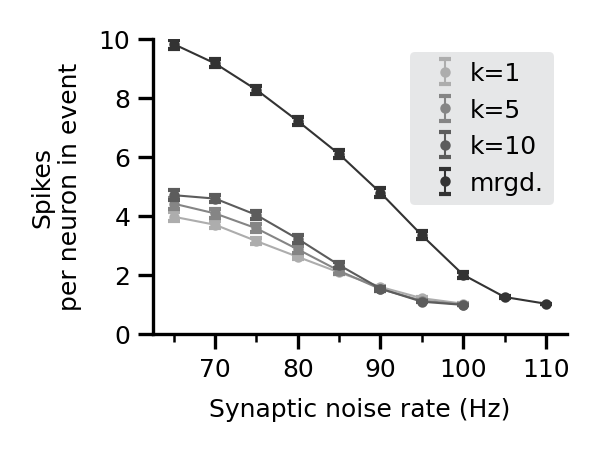

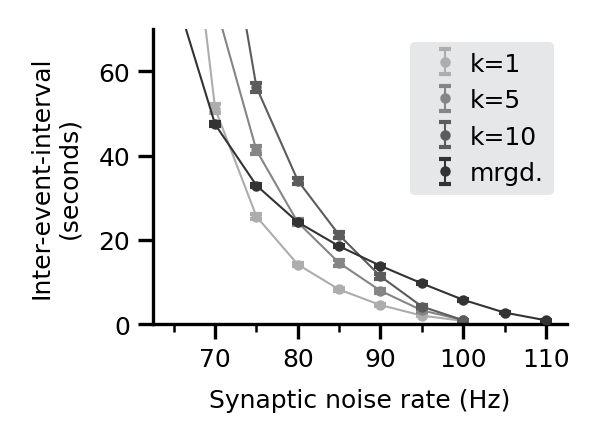

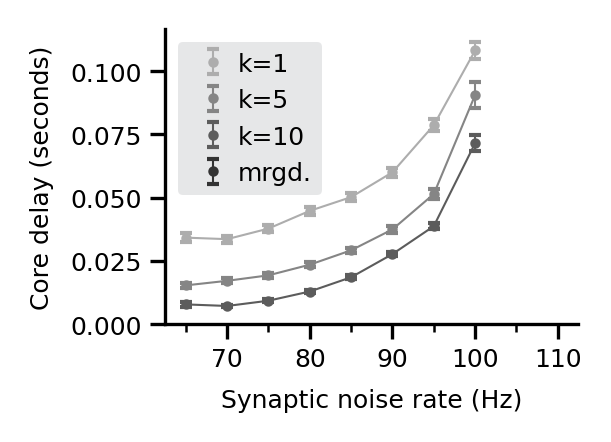

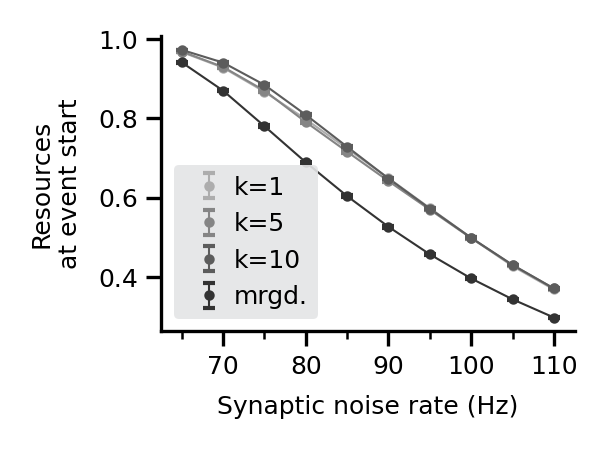

In [13]:
print(pp.fig_4.__doc__)
pp.show_legend = True
pp.fig_4()


    Wrapper to create the snapshots of LIF simulations in Figure 4 and the SM.
    - example raster plots
        * A sketch of the topology
        * Population-level rates in Hz (top)
        * Raster, color coded by module
        * Module-level synaptic resources available (bottom)
        * A zoomin of the raster of a single bursting event (right)
        Sorted by
            - the number of connections between modules (k)
            - and the "Synaptic Noise Rate" - a Poisson input provided to all neurons.
    - charge-discharge cycles for the examples in the raster plots.
    


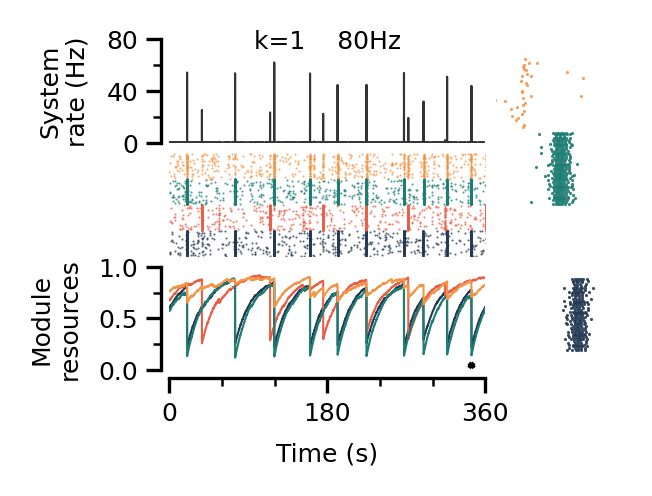

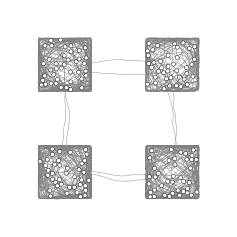

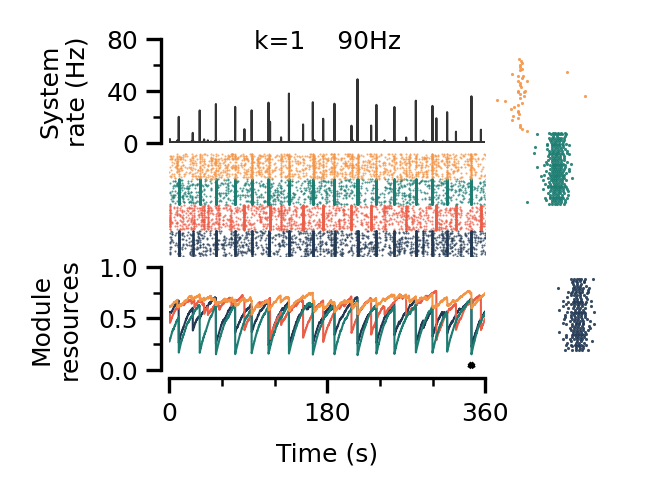

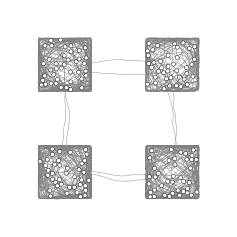

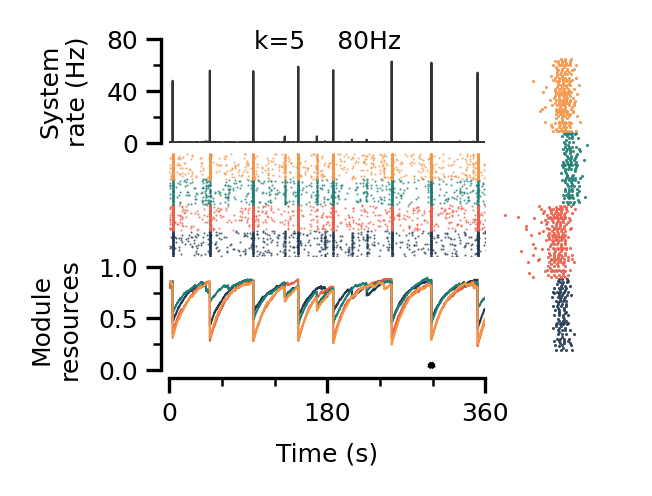

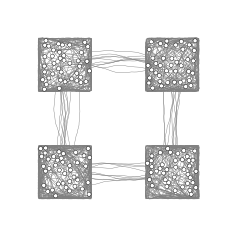

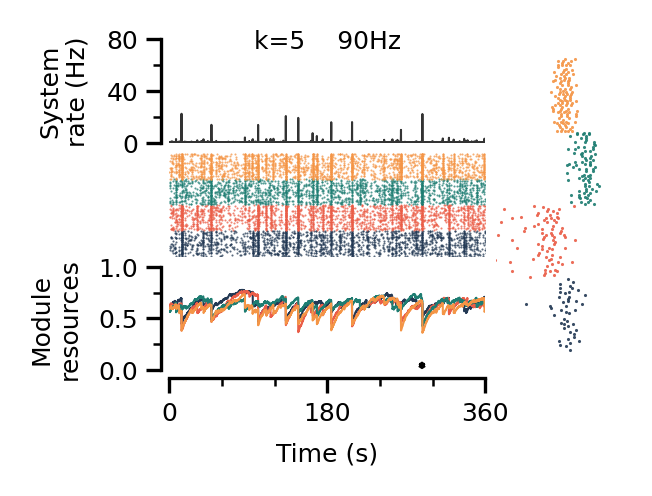

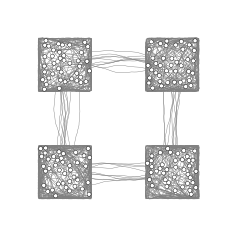

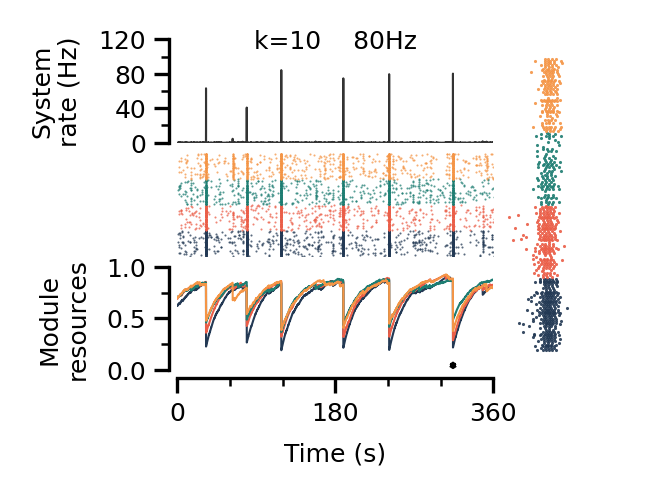

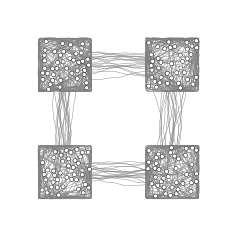

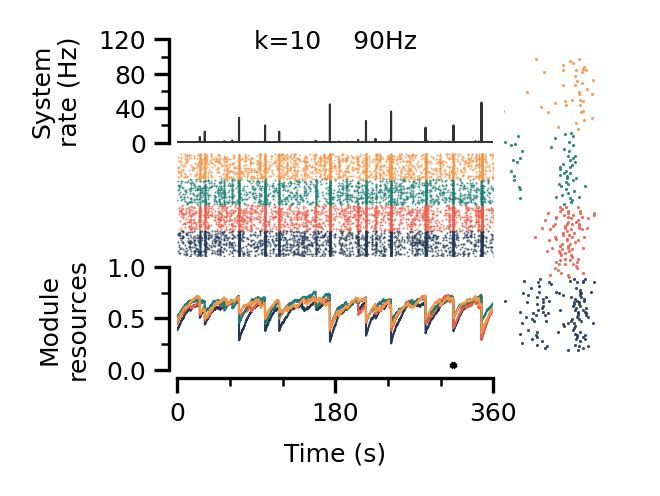

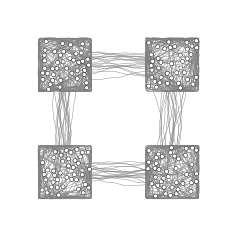

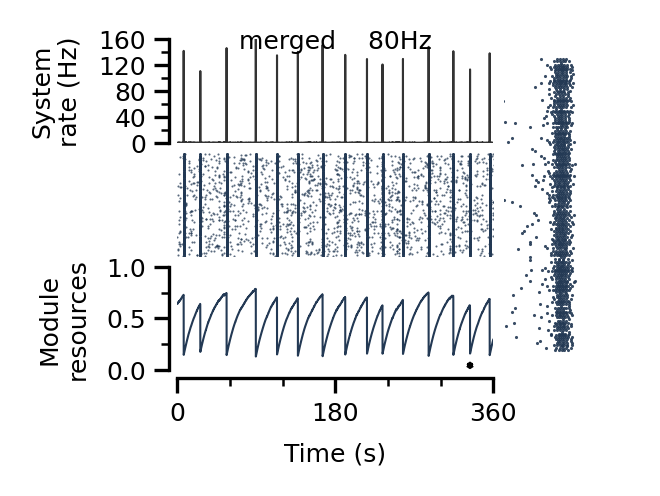

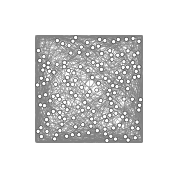

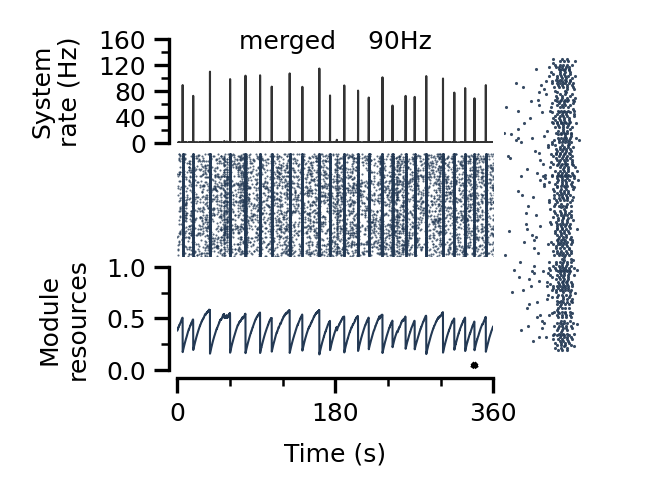

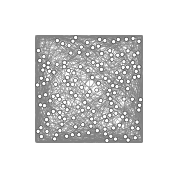

In [14]:
print(pp.fig_4_snapshots.__doc__)
pp.fig_4_snapshots(
    skip_rasters=False,
    # plotting resource cycles takes very long.
    skip_cycles=True,
)

## Inhomogeneous degree distribtions

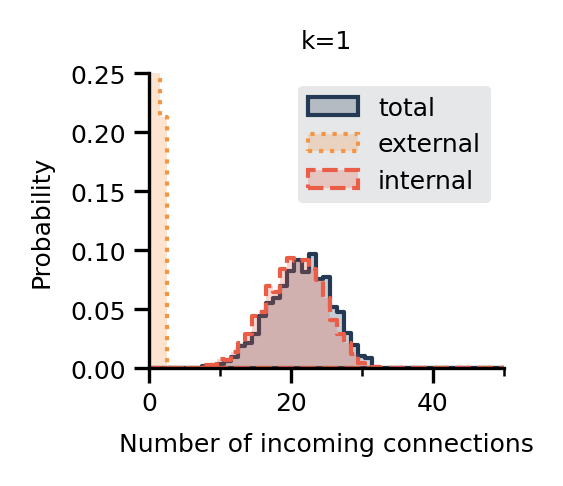

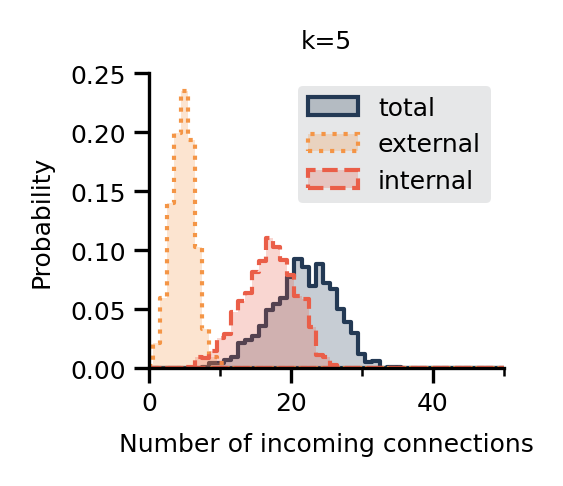

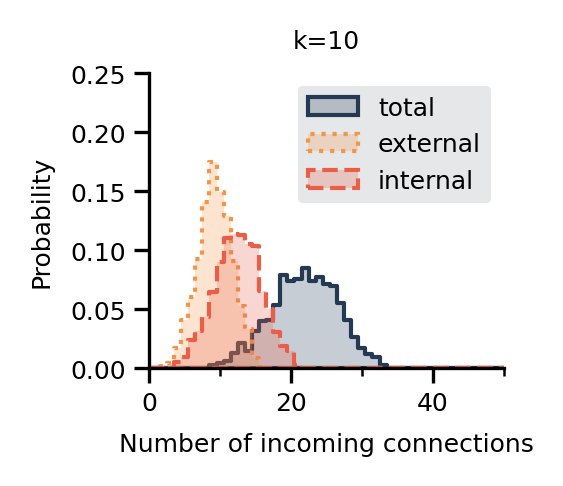

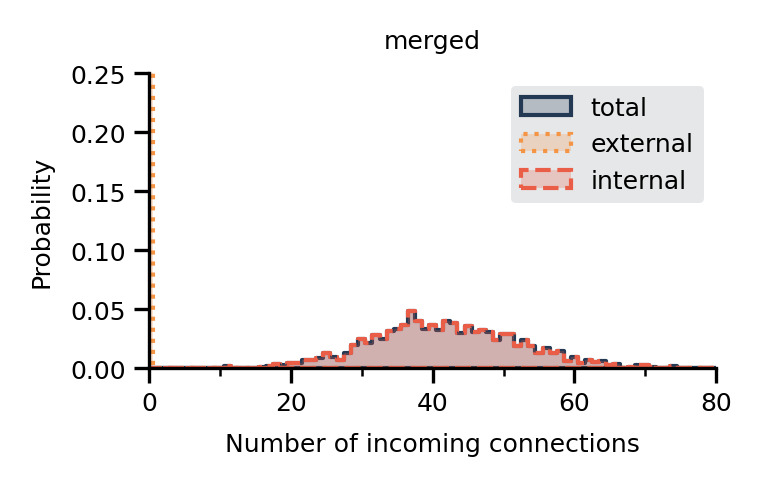

In [15]:
for k in [1, 5, 10, -1]:
    pp.sim_degrees_sampled(k_inter=k, num_reps=10)

# Mesoscopic Model


    Wrapper for Figure 5 (extended) on Mesoscopic model containing
    - As a function of increasing External input h:
        * Module-level correlation coefficients (mean)"
            - for different coupling values (low coupling light, high coupling dark)
            - Note that this is only loosely comparable to the rij of the neuron model
            as those were pairwise correlations.
        * The average number of modules that contributed in an event (like in Fig 4)
            - one panel for each coupling value
            - dark blue: 4 modules, ... light: 1 module
    - A sketch of the Resrouces vs Probability to disconnect.

    


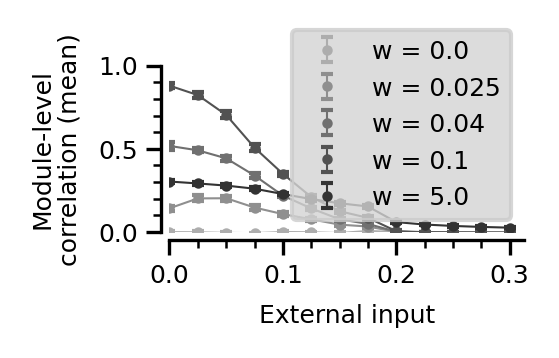

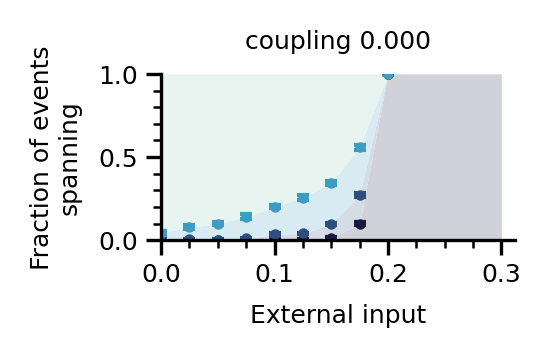

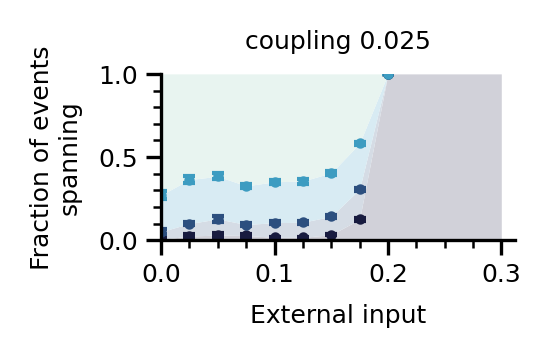

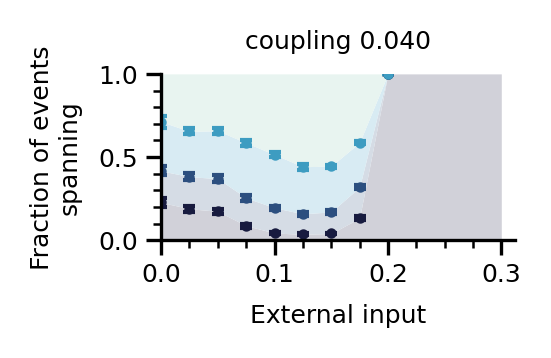

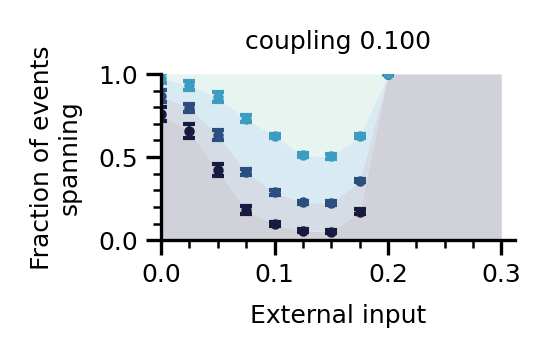

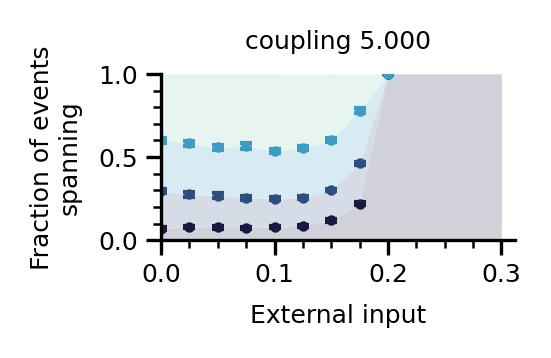

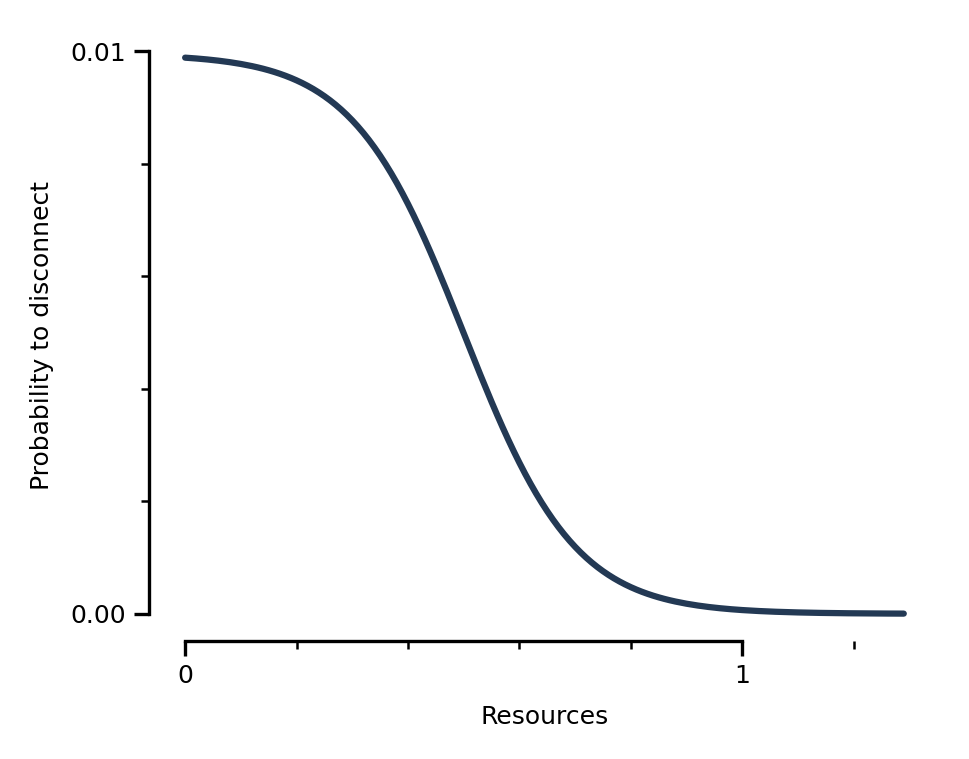

In [16]:
# Note: to get the version with gates disabled, manually provide the right
# file paths / loaded dset
print(pp.fig_5.__doc__)
pp.fig_5()


    Analogous to fig_4, we created snapshots of the time series of the mesoscopic
    model and the resource cycles.

    * Timeseries
        - top: Global average (black) and module-level Firing rates (colored by mod)
        - middle: state of the gates going out from each (colored) module, the colored
            bar indicates when the gate is connected and activity can pass
        - bottom: Available synaptic resources.
        - right, inset: zoom of all panels at the position marked by the black dot.
    * Cycles:
        - uses detectied time points of bursts ending,
        to depcit full charge-discharge repetition in the module-rate vs
        resources plane.
        - see also `ph.plot_resources_vs_activity`
    


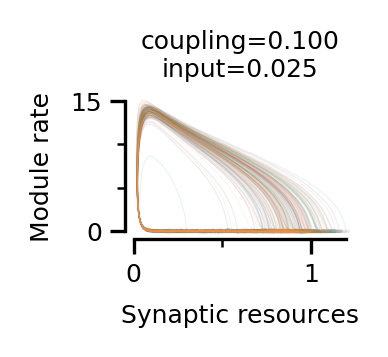

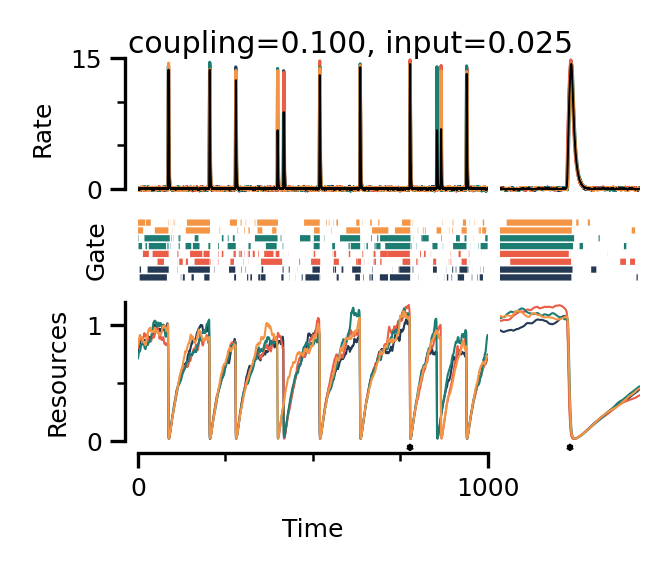

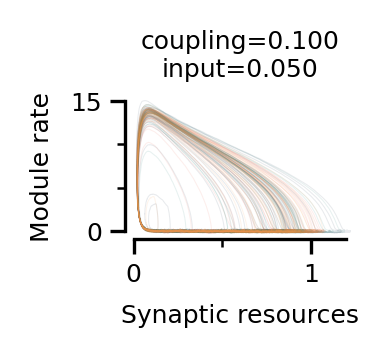

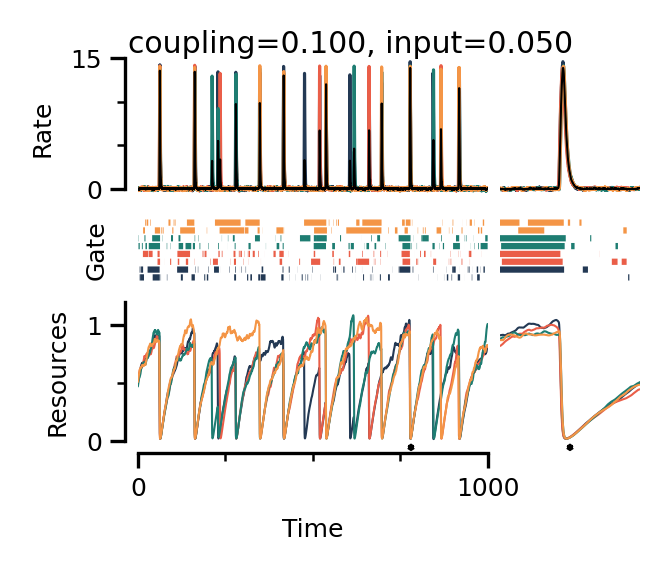

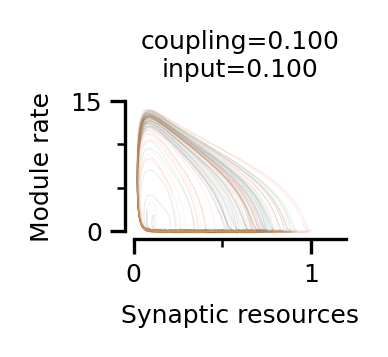

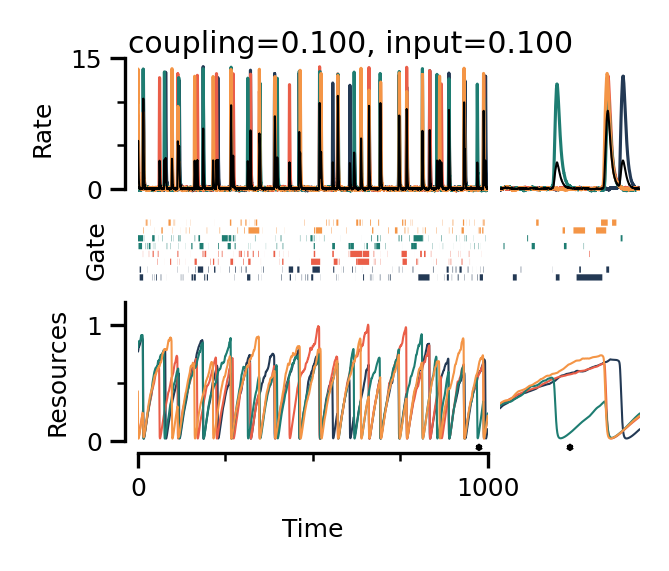

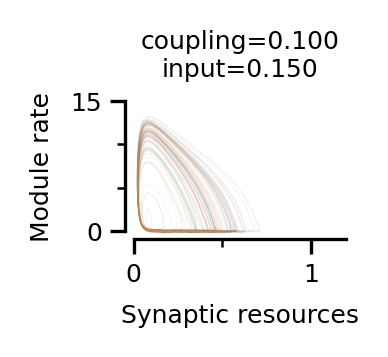

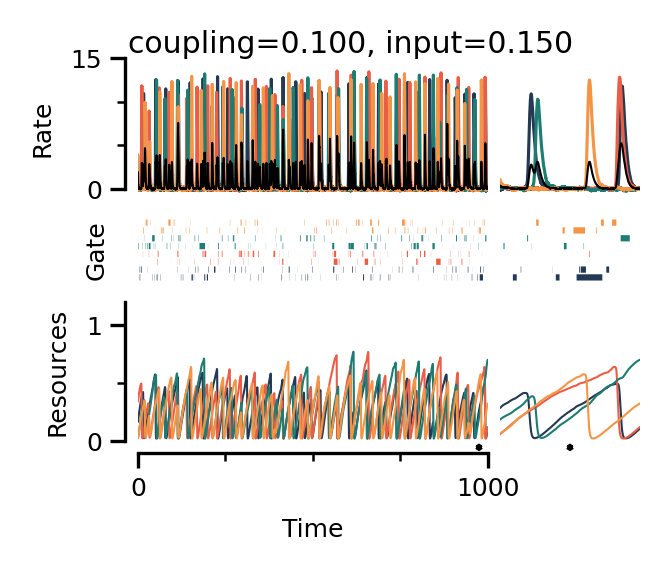

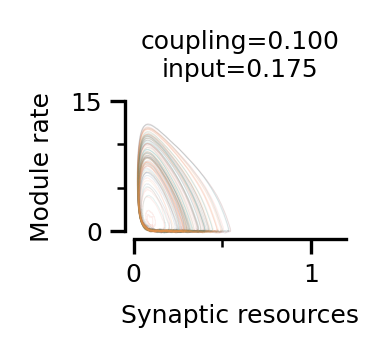

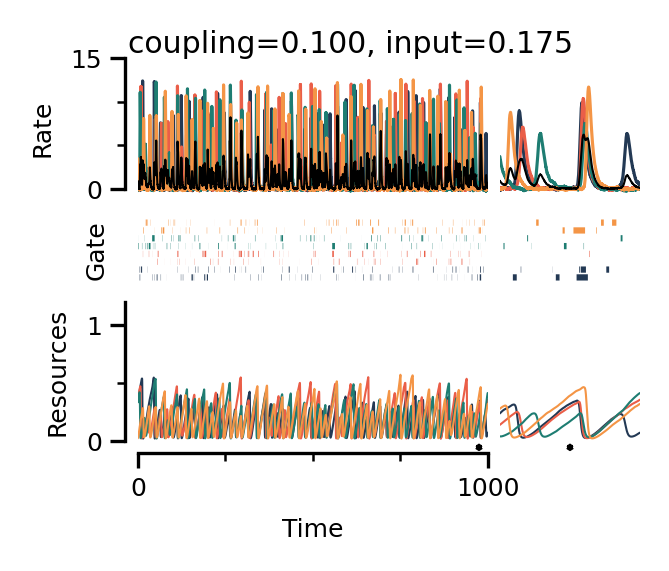

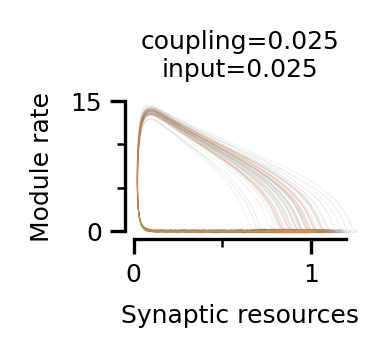

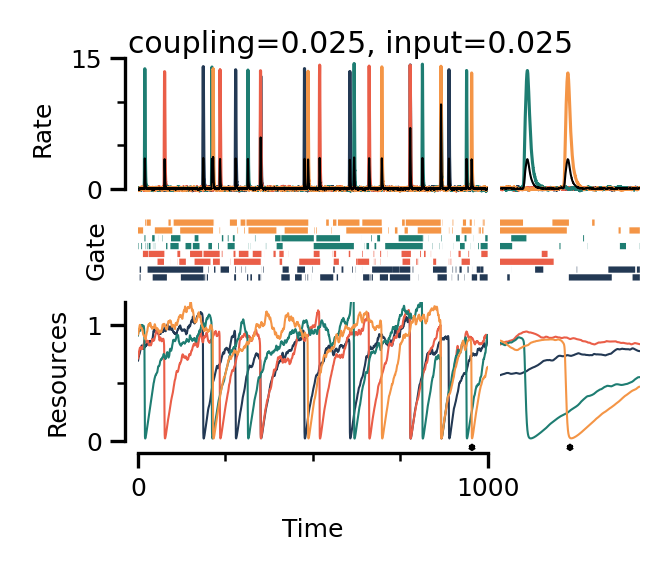

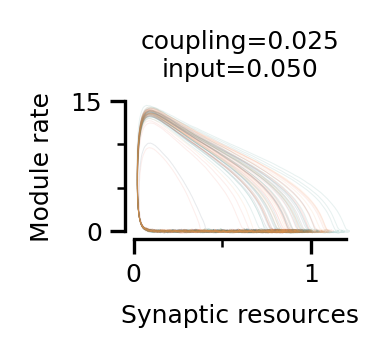

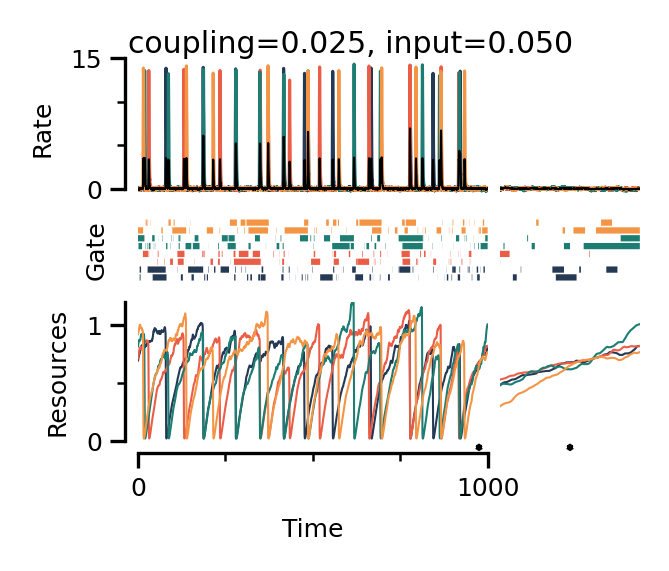

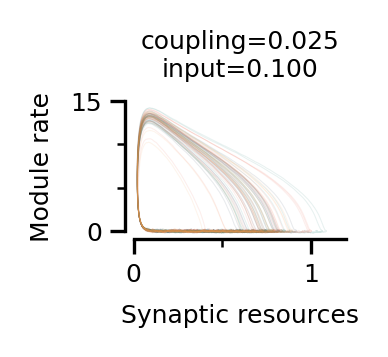

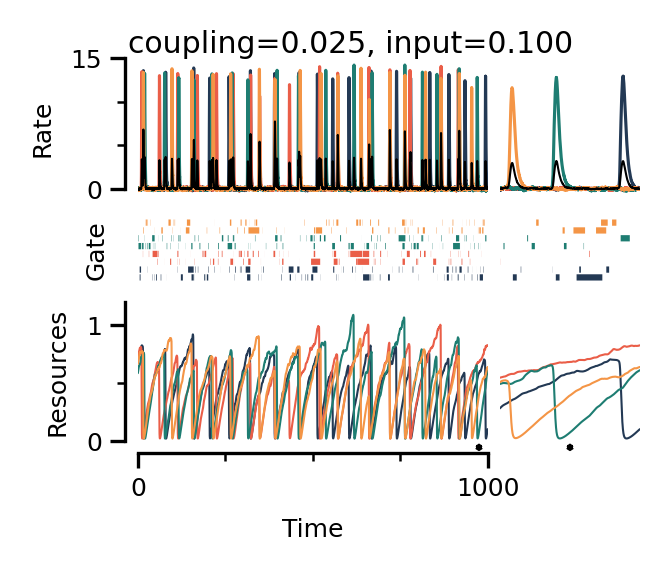

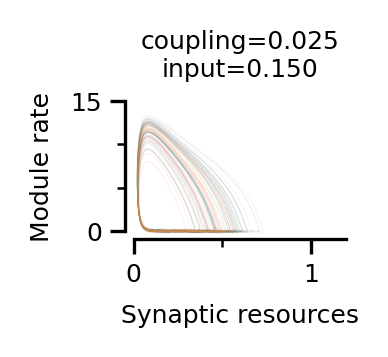

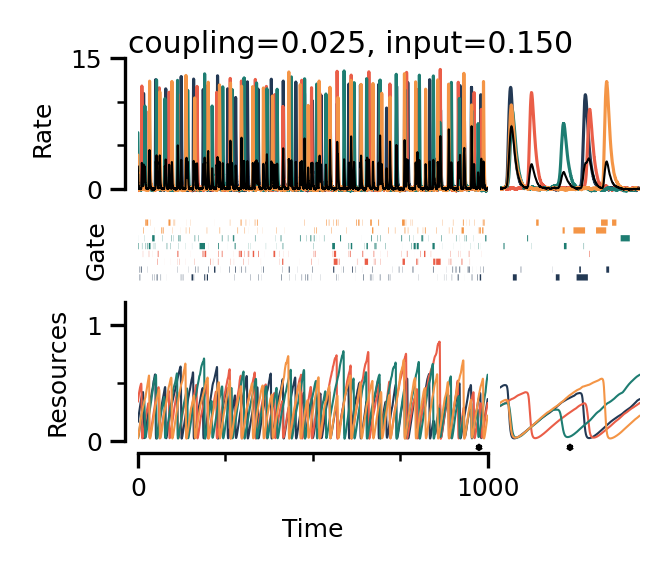

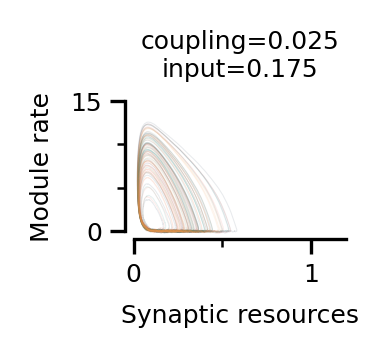

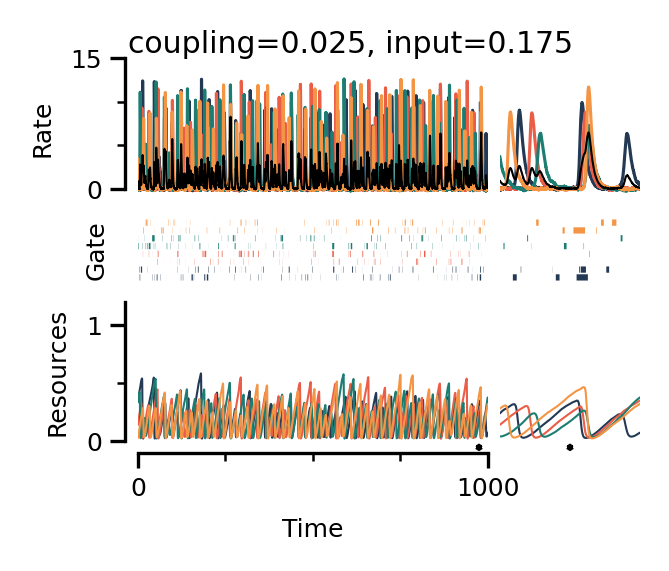

In [17]:
print(pp.fig_5_snapshots.__doc__)
pp.fig_5_snapshots()

## Interplay of noise and external input for individual modules


    Creates Suppl. Fig S7, exploring single-module dynamics in the mesoscopic model.

    * 3 panels showing the stationary (infinite time) solutions in different planes.
        - inputs go from low (blue) to medium (yellow) to high (red)
    * Matrix of flow fields
        - for increasting input strength h (left to right, matching colors from above)
        - and increasing noise intensity sigma (top to bottom)
        - gray lines indicate the trajectory a single module would _determinsitically_
            follow if placed at a given position in phase space
        - colored lines indicate actual trajectories, when the module is exposed
            to permutations due to the noise.
    


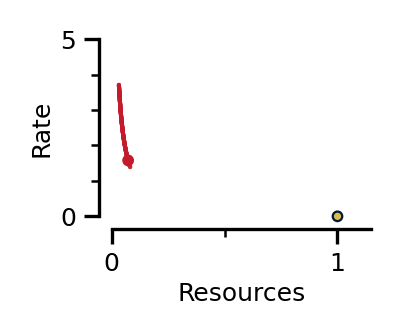

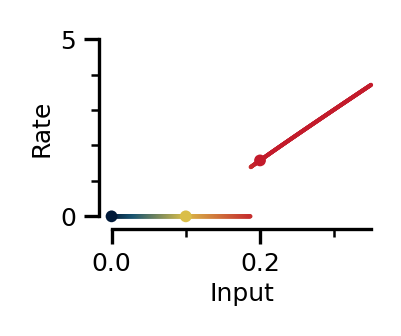

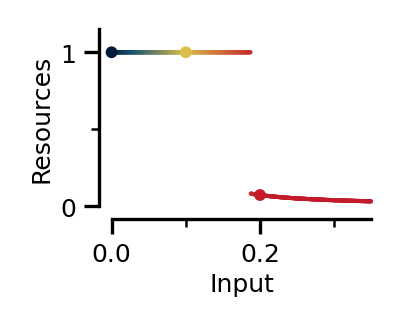

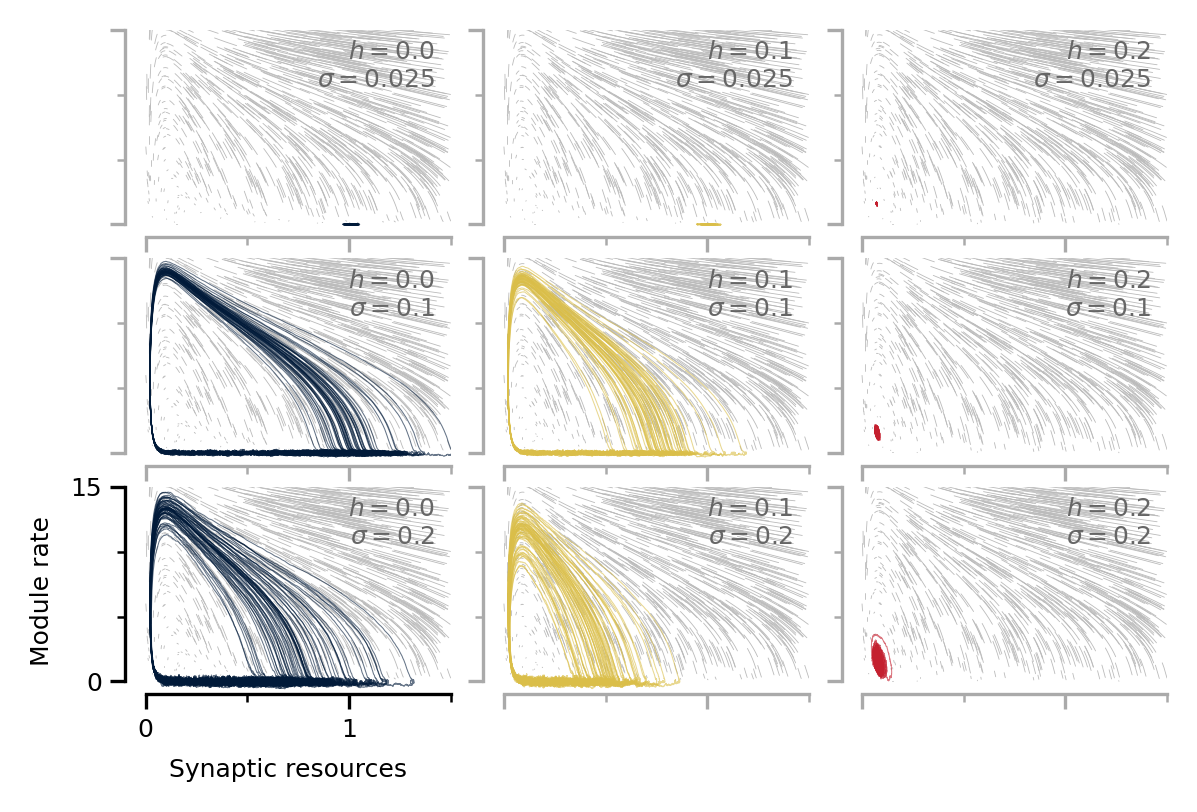

In [18]:
print(pp.fig_sm_meso_noise_and_input_flowfields.__doc__)
pp.fig_sm_meso_noise_and_input_flowfields()

In [19]:
# To explore the parameters of the mesoscopic model, try the following:
# check the parameters of the mesoscopic model
import sys; sys.path.append("../src/")
import mesoscopic_model as mm
print(mm.simulate_model.__doc__)
mm.default_pars


    Simulate the mesoscopic model with the given parameters.

    # Parameters:
    simulation_time: float
        Duration of the simulation in arbitrary units. use 1000 as a starting point

    gating_mechanism  : bool, optional
        Control whether the gating mechanism is used (default: True).
        If False, gates are not updated and activity can pass at all times.

    max_rsrc : float, optional
        Maximum amount of synaptic resources.

    tau_charge : float, optional
        Timescale of synaptical resource charging
    tau_discharge : float, optional
        Timescale of synaptical resource discharge

    tau_rate : float, optional
        Timescale of firing rate (activity) going to zero (exponential decay)

    sigma : float, optional
        Strenght of background noise fluctuations

    w0 : float, optional
        Coupling strenght between different nodes

    tau_disconnect : float, optional
        Timescale of gate becoming inactive, thus not letting activity

<class 'dict'>
├── gating_mechanism .................................................... bool  True
├── max_rsrc ........................................................... float  1.0
├── tau_charge ......................................................... float  40.0
├── tau_discharge ...................................................... float  5.0
├── tau_rate ........................................................... float  1.0
├── sigma .............................................................. float  0.1
├── w0 ................................................................. float  0.01
├── tau_disconnect ..................................................... float  1.0
├── tau_connect ........................................................ float  20.0
├── ext_str ............................................................ float  0.0
├── k_inpt ............................................................. float  1.6
├── thrs_inpt ...........................................

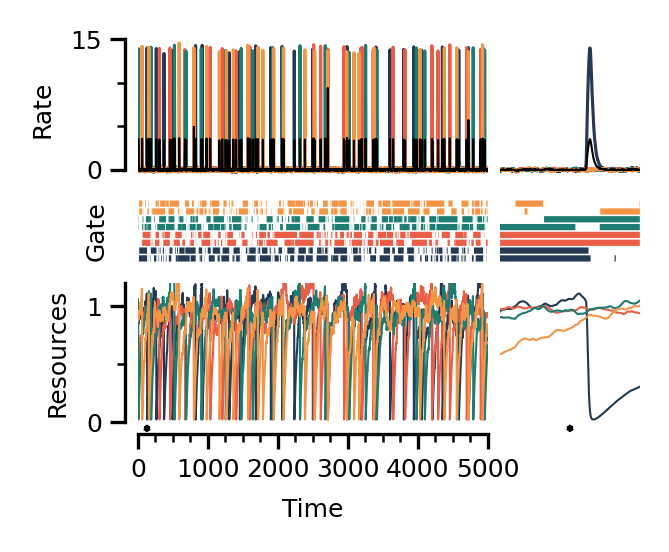

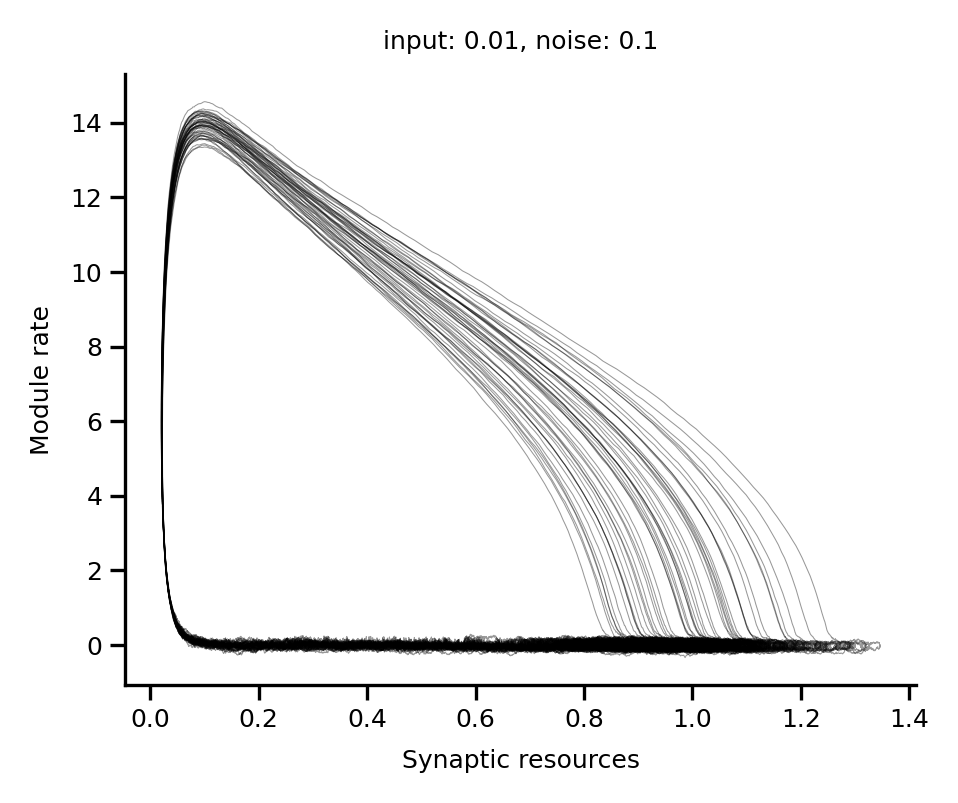

In [21]:
# tweak some of the parameters, kwargs are passed through to the simulation.
pp.meso_explore(
    simulation_time=5000,
    ext_str=0.01,
    w0=0.01,
    gating_mechanism=True
);

# TODO:
* update meso launcher path + comment about path and _long_ts
* show explore single for meso and brian